<a href="https://colab.research.google.com/github/shimohiro/EU_M_Math-Repository/blob/master/Chapter_%E2%85%A3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mp1
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [2]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

In [3]:
print('1つだけランダムに抽出：', np.random.choice(dice_data, 1))

1つだけランダムに抽出： [5]


In [4]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i] / calc_steps)
    print(i, 'が出る確率', p)

1 が出る確率 171
2 が出る確率 158
3 が出る確率 157
4 が出る確率 183
5 が出る確率 160
6 が出る確率 171


In [5]:
#練習問題4-1
coin_data = np.array([0,1])

N= 1000

np.random.seed(0)

count_coin = np.random.choice(coin_data, N)

for i in [0,1]:
    print(i,'が出る確率',len(count_coin[count_coin==i]) / N)

0 が出る確率 0.496
1 が出る確率 0.504


In [6]:
!ls

sample_data


In [7]:
mkdir chap4

In [8]:
cd ./chap4

/content/chap4


In [9]:
import requests, zipfile
from io import StringIO
import io

In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [12]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


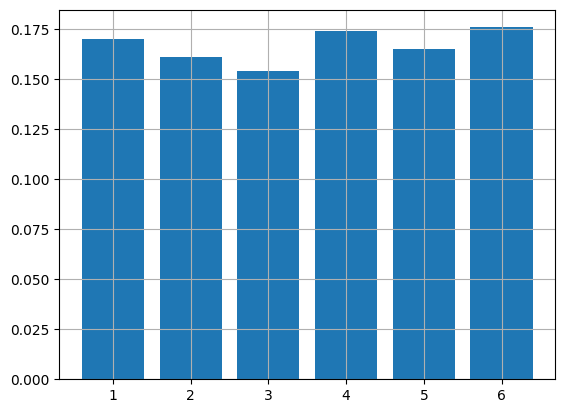

In [13]:
#一様分布
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [14]:
#ベルヌーイ分布
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


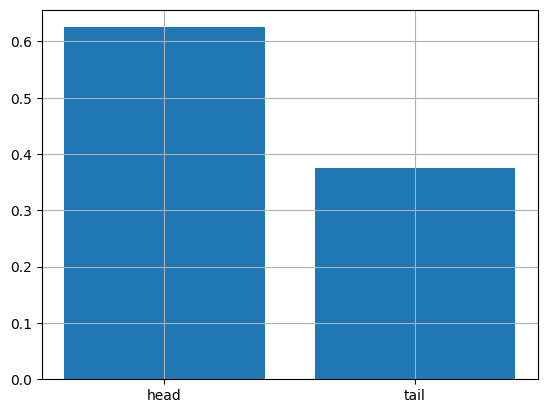

In [15]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

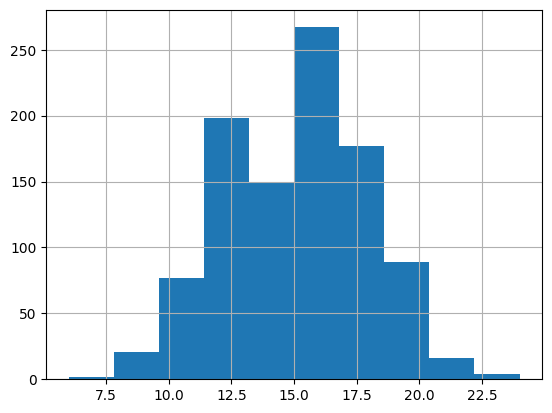

In [17]:
#二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

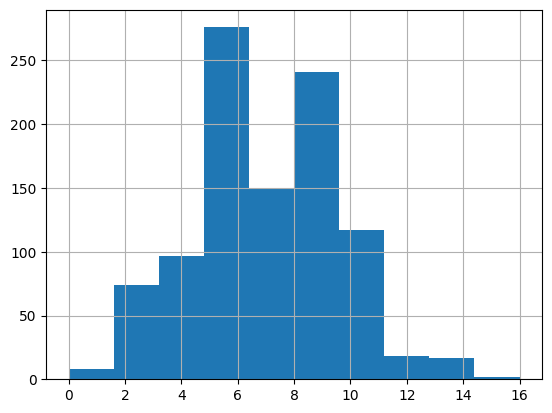

In [18]:
#ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

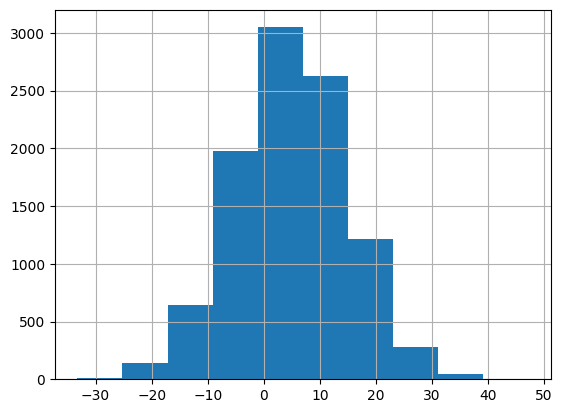

In [19]:
#正規分布
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

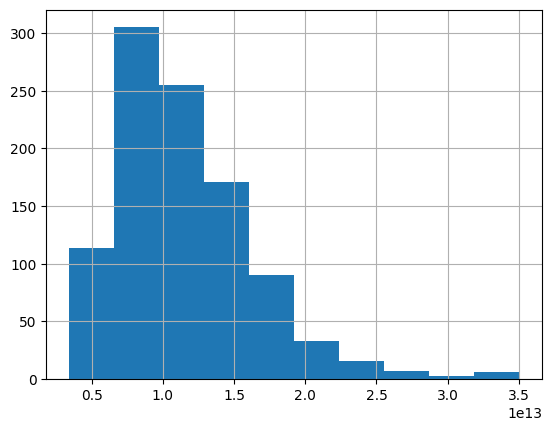

In [20]:
#対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

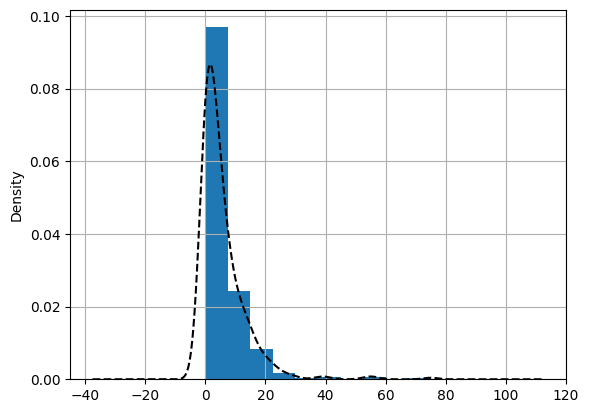

In [22]:
#カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

student_data_math.absences.hist(density=True)
plt.grid(True)

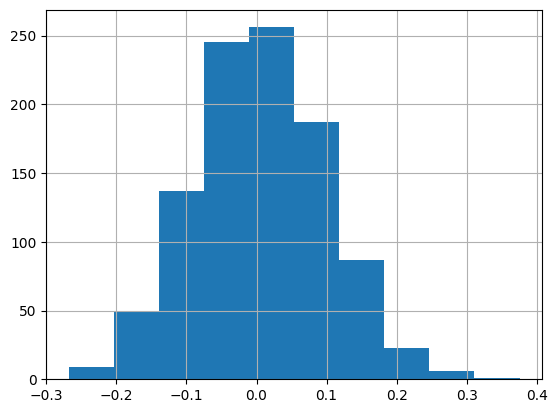

In [27]:
#練習問題4-4
sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(1000)]

plt.hist(sample_data)
plt.grid(True)

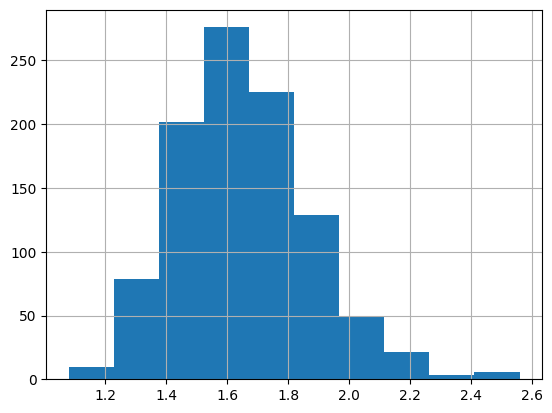

In [28]:
#練習問題4-5
sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(1000)]

plt.hist(sample_data)
plt.grid(True)

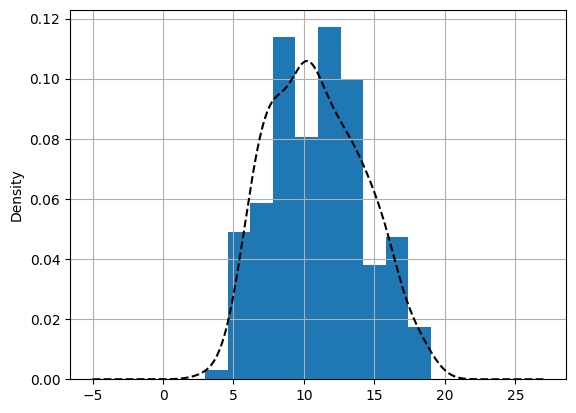

In [29]:
#練習問題4-6
student_data_math.G1.plot(kind='kde', style='k--')

student_data_math.G1.hist(density=True)
plt.grid(True)

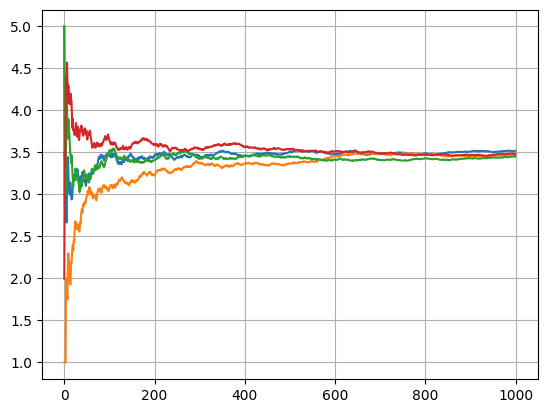

In [30]:
#大数の法則
calc_times = 1000

sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [35]:
#中心極限定理
def function_central_theory(N):

    sample_array = np.array([1, 2, 3, 4, 5, 6])
    number_cnt = np.arange(1, N + 1) * 1.0

    mean_array = np.array([])

    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array)
    plt.grid(True)

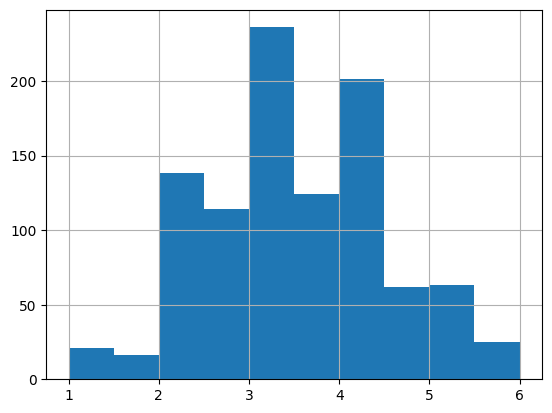

In [36]:
N=3
function_central_theory(3)

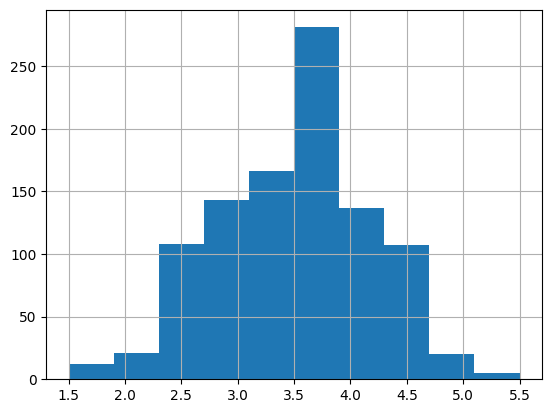

In [37]:
N=6
function_central_theory(6)

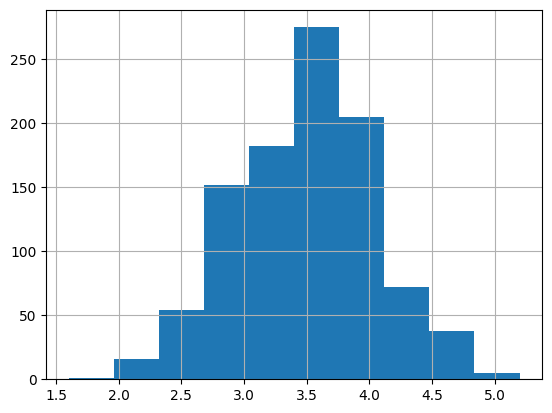

In [38]:
N=10
function_central_theory(10)

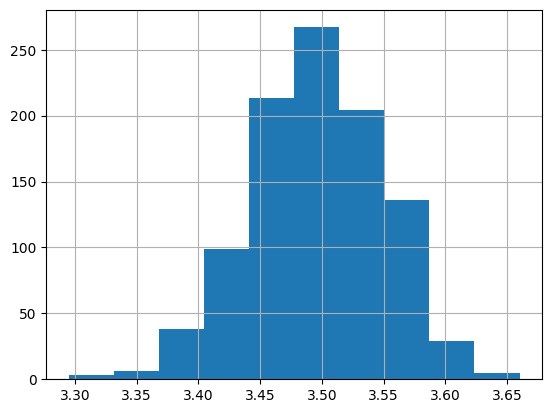

In [39]:
N=10^3
function_central_theory(10**3)

In [41]:
student_data_por = pd.read_csv('student-por.csv', sep=';')

student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())

G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


In [42]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p値 = ', p)

p値 =  1.6536555217101024e-16
